In [1]:
import pickle as pk

In [2]:
with open(r'C:\Users\ASUS\Desktop\Model\DogCatModel','rb') as file:
    model=pk.load(file)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-02-01 00:14:42         3102
metadata.json                                  2023-02-01 00:14:42           64
variables.h5                                   2023-02-01 00:14:48     52505144
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\conv2d
......vars
.........0
.........1
...layers\conv2d_1
......vars
.........0
.........1
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\flatten
......vars
...layers\max_pooling2d
......vars
...layers\max_pooling2d_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
......

In [3]:
model

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import keras
import tensorflow
import cv2

In [5]:
DIRECTORIES=r'C:\Users\ASUS\Desktop\Dog and Cat Dataset\test1'
CATAGORIES=['test1']

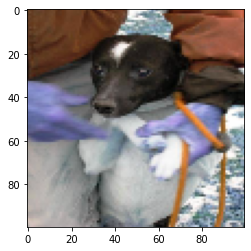

In [6]:
daata=[]
for catagories in CATAGORIES:
    folder=os.path.join(DIRECTORIES,catagories)
    
    #label=CATAGORIES.index(catagories)
   # print(label)
    for img in os.listdir(folder):
        img_path=os.path.join(folder,img)
        img_array=cv2.imread(img_path)
        img_g=cv2.resize(img_array,(100,100))
        plt.imshow(img_g)
        daata.append(img_g)
        break

In [7]:
daata=np.array(daata,dtype='float32')
data=daata/255
data

array([[[[0.39215687, 0.26666668, 0.16470589],
         [0.38431373, 0.23921569, 0.13725491],
         [0.38039216, 0.22352941, 0.1254902 ],
         ...,
         [0.78431374, 0.39607844, 0.28627452],
         [0.8156863 , 0.42745098, 0.3019608 ],
         [0.7176471 , 0.36078432, 0.22352941]],

        [[0.3647059 , 0.23921569, 0.13725491],
         [0.43529412, 0.28627452, 0.18431373],
         [0.39607844, 0.23921569, 0.14117648],
         ...,
         [0.76862746, 0.39215687, 0.3019608 ],
         [0.8156863 , 0.41568628, 0.3254902 ],
         [0.7411765 , 0.3529412 , 0.25490198]],

        [[0.34901962, 0.22352941, 0.12156863],
         [0.38039216, 0.23529412, 0.13333334],
         [0.39607844, 0.23921569, 0.14117648],
         ...,
         [0.74509805, 0.39215687, 0.27450982],
         [0.80784315, 0.42352942, 0.30588236],
         [0.7294118 , 0.34901962, 0.21960784]],

        ...,

        [[0.827451  , 0.7647059 , 0.7372549 ],
         [0.8235294 , 0.7607843 , 0.73333335]

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [9]:
data.shape

(1, 100, 100, 3)

In [10]:
pred=model.predict(data)

1/1 [==============================] - 0s 173ms/step


In [11]:
pred

array([[0.00981024, 0.99018973]], dtype=float32)

In [12]:
pred=np.argmax(pred,axis=1)
pred

array([1], dtype=int64)

In [21]:
if pred==1:
    print("Dog")

Dog


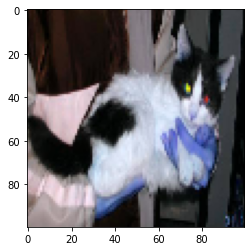

In [13]:
img_array=cv2.imread(r'C:\Users\ASUS\Desktop\Dog and Cat Dataset\test1\test1\14.jpg')
img_g=cv2.resize(img_array,(100,100))
plt.imshow(img_g)
#daata.append(img_g)

In [14]:
daata=np.array(img_g,dtype='float32')
data=daata/255
data

array([[[0.1254902 , 0.08235294, 0.06666667],
        [0.1764706 , 0.09019608, 0.06666667],
        [0.16470589, 0.07843138, 0.03529412],
        ...,
        [0.24705882, 0.25882354, 0.2784314 ],
        [0.25882354, 0.27058825, 0.2901961 ],
        [0.02745098, 0.04313726, 0.04705882]],

       [[0.11372549, 0.07058824, 0.05490196],
        [0.17254902, 0.08627451, 0.0627451 ],
        [0.15686275, 0.07843138, 0.03529412],
        ...,
        [0.25882354, 0.27058825, 0.2901961 ],
        [0.25490198, 0.26666668, 0.28627452],
        [0.01960784, 0.03529412, 0.03921569]],

       [[0.08235294, 0.05490196, 0.03529412],
        [0.1764706 , 0.10588235, 0.07843138],
        [0.14901961, 0.07843138, 0.03529412],
        ...,
        [0.2627451 , 0.27450982, 0.29411766],
        [0.2509804 , 0.2627451 , 0.28235295],
        [0.02745098, 0.04313726, 0.04705882]],

       ...,

       [[0.6117647 , 0.54901963, 0.5529412 ],
        [0.61960787, 0.5529412 , 0.56078434],
        [0.61960787, 0

In [15]:
data

array([[[0.1254902 , 0.08235294, 0.06666667],
        [0.1764706 , 0.09019608, 0.06666667],
        [0.16470589, 0.07843138, 0.03529412],
        ...,
        [0.24705882, 0.25882354, 0.2784314 ],
        [0.25882354, 0.27058825, 0.2901961 ],
        [0.02745098, 0.04313726, 0.04705882]],

       [[0.11372549, 0.07058824, 0.05490196],
        [0.17254902, 0.08627451, 0.0627451 ],
        [0.15686275, 0.07843138, 0.03529412],
        ...,
        [0.25882354, 0.27058825, 0.2901961 ],
        [0.25490198, 0.26666668, 0.28627452],
        [0.01960784, 0.03529412, 0.03921569]],

       [[0.08235294, 0.05490196, 0.03529412],
        [0.1764706 , 0.10588235, 0.07843138],
        [0.14901961, 0.07843138, 0.03529412],
        ...,
        [0.2627451 , 0.27450982, 0.29411766],
        [0.2509804 , 0.2627451 , 0.28235295],
        [0.02745098, 0.04313726, 0.04705882]],

       ...,

       [[0.6117647 , 0.54901963, 0.5529412 ],
        [0.61960787, 0.5529412 , 0.56078434],
        [0.61960787, 0

In [16]:
data=data.reshape(1,100,100,3)
data

array([[[[0.1254902 , 0.08235294, 0.06666667],
         [0.1764706 , 0.09019608, 0.06666667],
         [0.16470589, 0.07843138, 0.03529412],
         ...,
         [0.24705882, 0.25882354, 0.2784314 ],
         [0.25882354, 0.27058825, 0.2901961 ],
         [0.02745098, 0.04313726, 0.04705882]],

        [[0.11372549, 0.07058824, 0.05490196],
         [0.17254902, 0.08627451, 0.0627451 ],
         [0.15686275, 0.07843138, 0.03529412],
         ...,
         [0.25882354, 0.27058825, 0.2901961 ],
         [0.25490198, 0.26666668, 0.28627452],
         [0.01960784, 0.03529412, 0.03921569]],

        [[0.08235294, 0.05490196, 0.03529412],
         [0.1764706 , 0.10588235, 0.07843138],
         [0.14901961, 0.07843138, 0.03529412],
         ...,
         [0.2627451 , 0.27450982, 0.29411766],
         [0.2509804 , 0.2627451 , 0.28235295],
         [0.02745098, 0.04313726, 0.04705882]],

        ...,

        [[0.6117647 , 0.54901963, 0.5529412 ],
         [0.61960787, 0.5529412 , 0.56078434]

In [17]:
pre=model.predict(data)

1/1 [==============================] - 0s 31ms/step


In [18]:
pre

array([[9.9960274e-01, 3.9731446e-04]], dtype=float32)

In [19]:
pre=np.argmax(pre,axis=1)
pre

array([0], dtype=int64)

In [20]:
if pre==0:
    print("cat")

cat
